In [1]:
import pandas as pd
credit_df = pd.read_csv("../data/creditcard.csv")


In [2]:
credit_df = credit_df.drop_duplicates()
missing_summary = credit_df.isnull().sum().to_frame(name="Missing Count")
missing_summary["Missing %"] = missing_summary["Missing Count"] / len(credit_df) * 100
display(missing_summary)


,Missing Count,Missing %
Time,0,0.0
V1,0,0.0
V2,0,0.0
V3,0,0.0
V4,0,0.0
V5,0,0.0
V6,0,0.0
V7,0,0.0
V8,0,0.0
V9,0,0.0


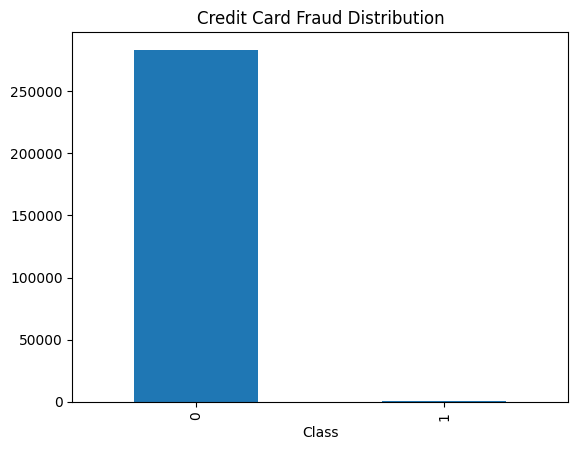

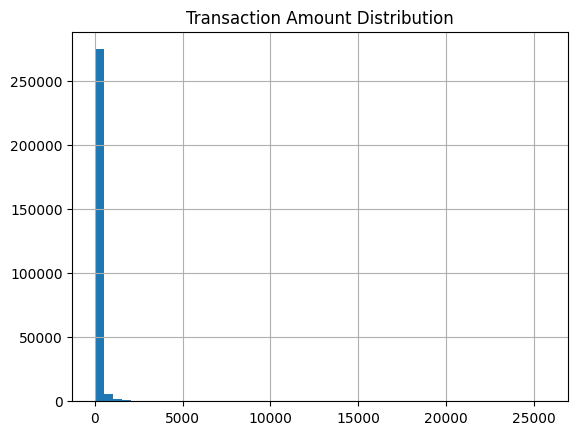

In [3]:
import matplotlib.pyplot as plt

# Class distribution
credit_df['Class'].value_counts().plot(kind='bar', title="Credit Card Fraud Distribution")
plt.show()

# Transaction amount distribution
credit_df['Amount'].hist(bins=50)
plt.title("Transaction Amount Distribution")
plt.show()


In [8]:
import sys
import os

# Add parent directory to sys.path so Python can find src
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

from src.preprocessing import separate_features_target, scale_numeric



In [9]:
from src.preprocessing import separate_features_target, scale_numeric

X_credit, y_credit = separate_features_target(credit_df, 'Class')
X_credit = scale_numeric(X_credit, ['Amount'])


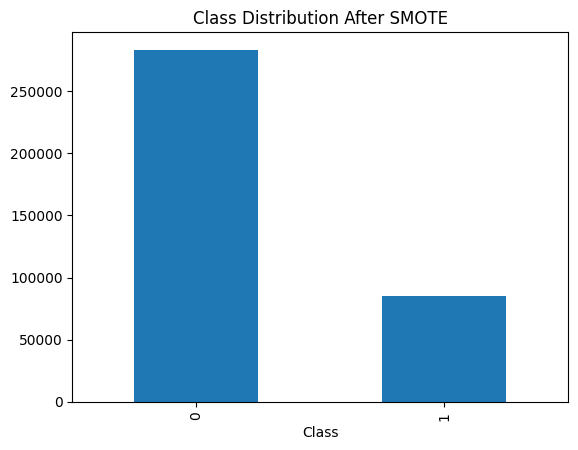

In [10]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, sampling_strategy=0.3)
X_credit_res, y_credit_res = smote.fit_resample(X_credit, y_credit)

# Visualization
y_credit_res.value_counts().plot(kind='bar', title="Class Distribution After SMOTE")
plt.show()
